## Importing  Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from windrose import WindroseAxes
import matplotlib.pyplot as plt

## Loading the data

In [2]:
df = pd.read_csv("../data/sierraleone-bumbuna.csv")

In [3]:
# lets check if the dataset is loaded
print(f"The shape of dataset is {df.shape}")
print(f"This dataset has {df.shape[0]} rows (examples of data).")
print(f"This dataset has {df.shape[1]} columns (features of data).")


The shape of dataset is (525600, 19)
This dataset has 525600 rows (examples of data).
This dataset has 19 columns (features of data).


# 1. Summary Statistics & Missing-Value Report

In [4]:
# first five rows of tabular data
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [5]:
# log the last examples of this dataset
df.tail()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525595,2022-10-29 23:56,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525596,2022-10-29 23:57,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525597,2022-10-29 23:58,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525598,2022-10-29 23:59,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525599,2022-10-30 00:00,-1.7,-0.1,-3.4,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN


In [6]:
# log random 5 exaples of the dataset
df.sample(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
388271,2022-07-26 15:12,766.2,450.7,390.0,699.7,678.4,28.4,77.6,2.7,3.4,0.5,264.8,16.4,1001,0,0.0,39.8,40.8,NaN
525593,2022-10-29 23:54,-1.4,-0.1,-2.5,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.2,24.6,NaN
36331,2021-11-24 05:32,-1.1,-0.1,-1.2,0.0,0.0,23.6,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,23.8,24.2,NaN
362314,2022-07-08 14:35,309.0,0.7,307.7,308.5,300.6,30.1,70.9,0.0,0.4,0.1,321.1,0.0,1002,0,0.0,42.7,41.6,NaN
113588,2022-01-16 21:09,-11.2,-0.6,-11.5,0.0,0.0,23.6,74.0,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.2,22.5,NaN


In [7]:
# check more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [8]:
# check if a null value exists
print("Check for missing values:")
df.isna().sum()

Check for missing values:


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [9]:
# 1. Calculate the percentage of missing values for every column
null_percentages = df.isnull().sum() / len(df) * 100

# 2. Filter the resulting Series for percentages greater than 5
columns_with_high_nulls = null_percentages[null_percentages > 5]

# 3. Print the results
print("Columns with >5% Null Values:")
print(columns_with_high_nulls)

Columns with >5% Null Values:
Comments    100.0
dtype: float64


In [10]:
# Drop the column that contains virtually no data
df.drop(columns=['Comments'], inplace=True)

In [11]:
# check if null column dorped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [12]:
# Check if null rows exist
# 1. Define the critical columns
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB','Timestamp', 'Tamb','RH','WS','WSgust','WSstdev','WD','WDstdev','Cleaning','Precipitation','TModA','TModB']

# 2. Create a boolean mask:
missing_rows_mask = df[key_cols].isnull().any(axis=1)

# 3. Use the mask to display the subset of rows with missing data
missing_value_rows = df[missing_rows_mask]

# 4. Display the resulting DataFrame
print(f"Total rows with missing values in the key columns: {len(missing_value_rows)}")
print("Rows with Missing Data (only showing the key columns for focus):")
print(missing_value_rows[key_cols])

Total rows with missing values in the key columns: 0
Rows with Missing Data (only showing the key columns for focus):
Empty DataFrame
Columns: [GHI, DNI, DHI, ModA, ModB, Timestamp, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, Cleaning, Precipitation, TModA, TModB]
Index: []


In [13]:
#Overview of categorical columns
print("The description of the categorical columns:")
print(df.describe(include=['object']))

The description of the categorical columns:
               Timestamp
count             525600
unique            525600
top     2021-10-30 00:01
freq                   1


In [14]:
# log and check the frequency, and uniqueness of all dataset column
print("The description of all columns:")
print(df.describe(include='all'))


The description of all columns:
               Timestamp            GHI            DNI            DHI  \
count             525600  525600.000000  525600.000000  525600.000000   
unique            525600            NaN            NaN            NaN   
top     2021-10-30 00:01            NaN            NaN            NaN   
freq                   1            NaN            NaN            NaN   
mean                 NaN     201.957515     116.376337     113.720571   
std                  NaN     298.495150     218.652659     158.946032   
min                  NaN     -19.500000      -7.800000     -17.900000   
25%                  NaN      -2.800000      -0.300000      -3.800000   
50%                  NaN       0.300000      -0.100000      -0.100000   
75%                  NaN     362.400000     107.000000     224.700000   
max                  NaN    1499.000000     946.000000     892.000000   

                 ModA           ModB           Tamb             RH  \
count   525600.000000

In [15]:
#check if duplication of rows exist
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

Duplicate rows: 0


In [16]:
# Cardinality (uniqueness) for categoricals
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
cardinality = {c: df[c].nunique() for c in cat_cols}
print("Cardinality (categoricals):", cardinality)

Cardinality (categoricals): {'Timestamp': 525600}



# 2) univariant Analysis


## Univariate Analysis

 Let's Apply Exploratory Data Analysis Technique

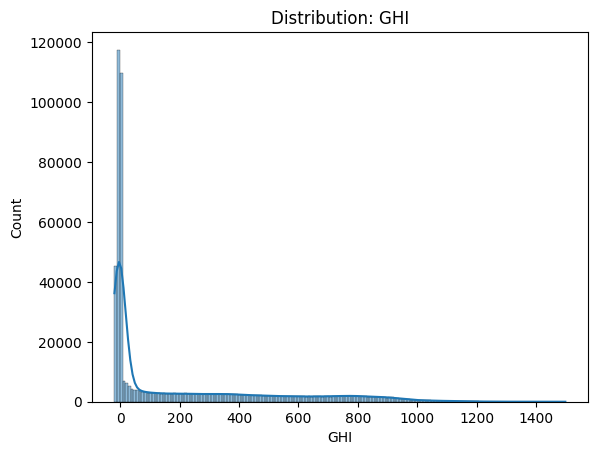

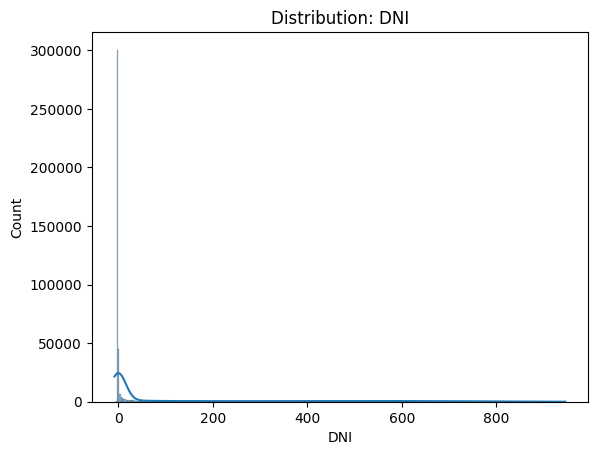

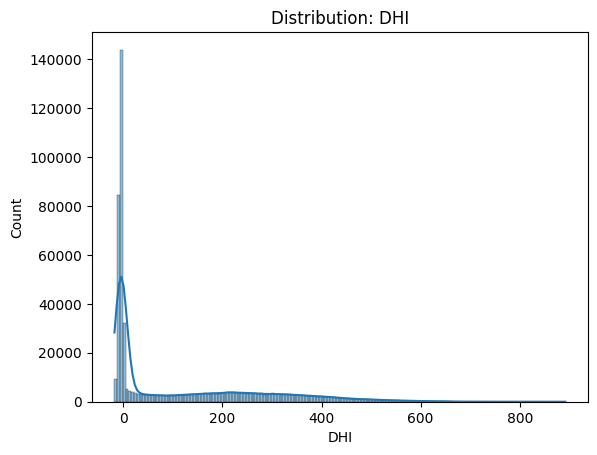

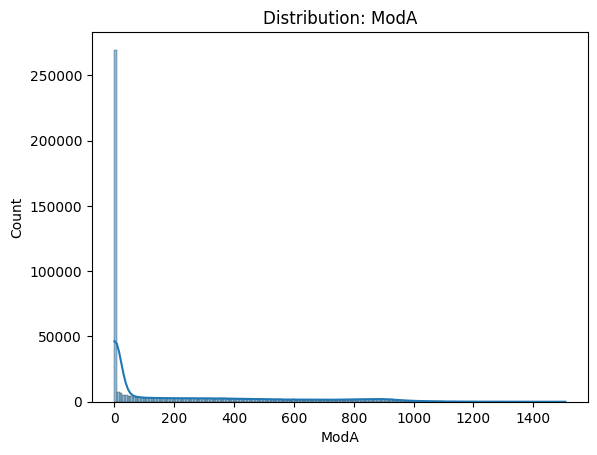

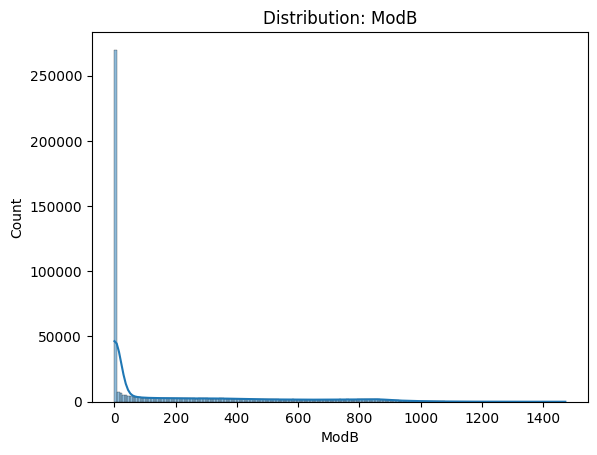

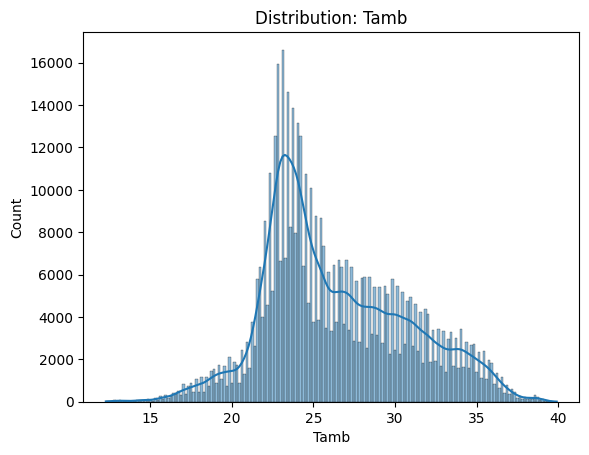

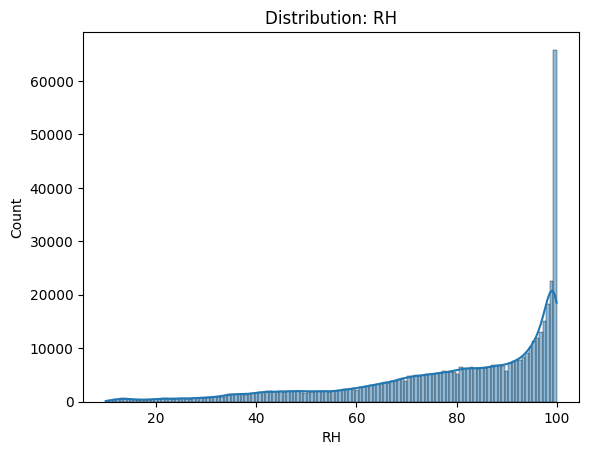

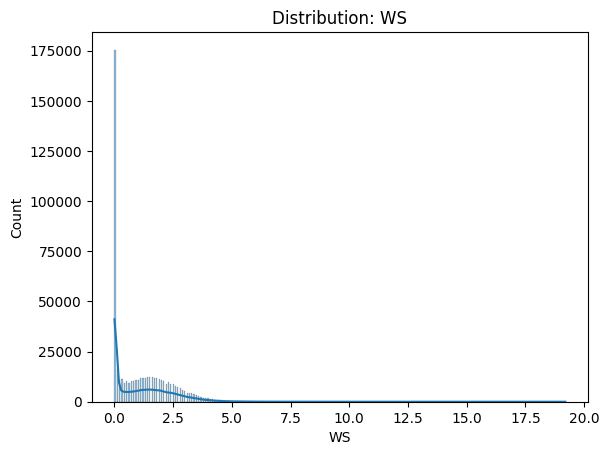

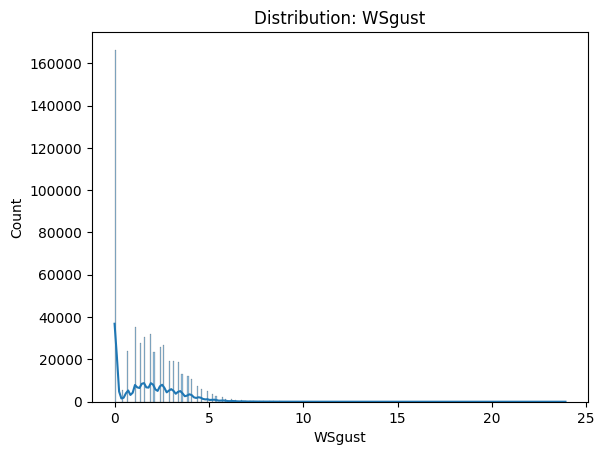

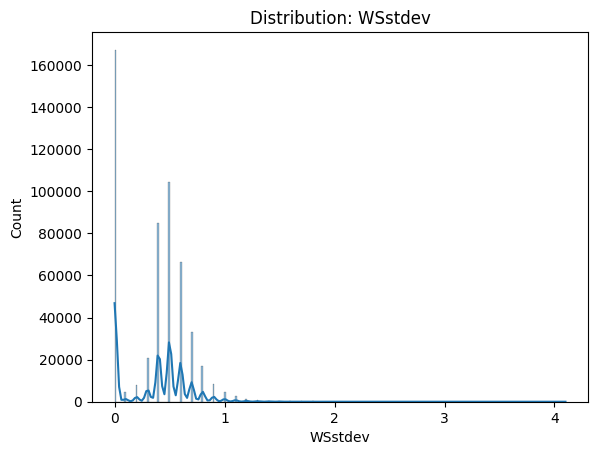

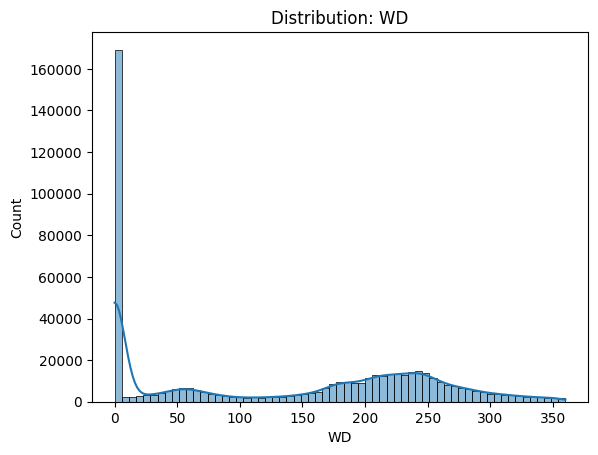

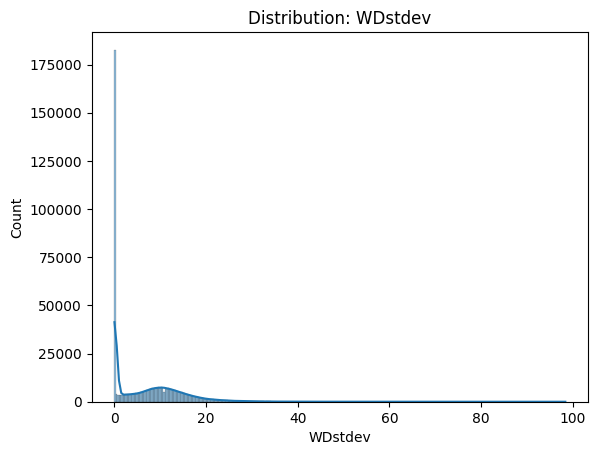

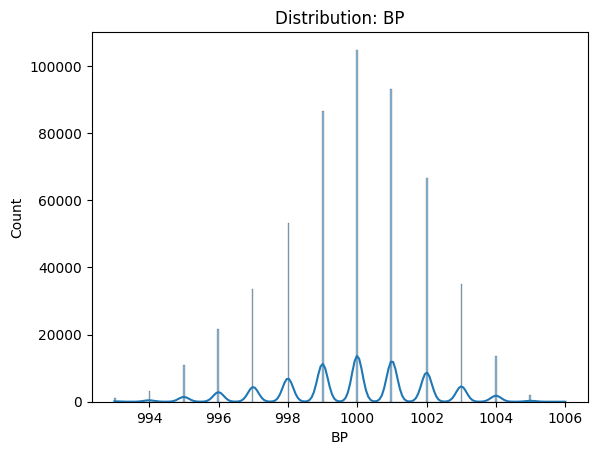

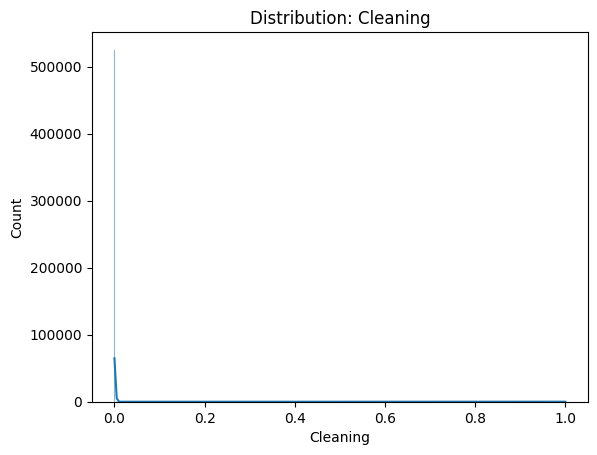

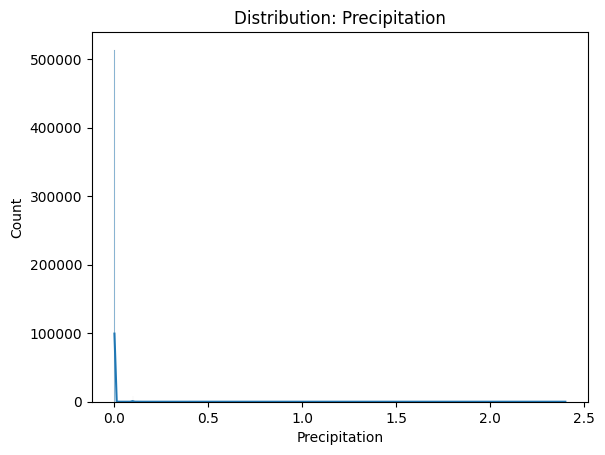

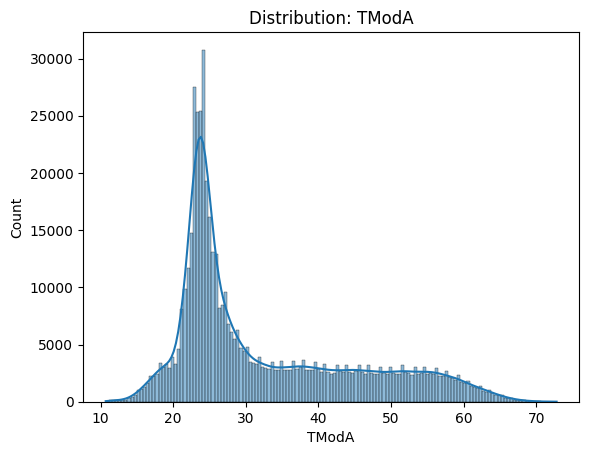

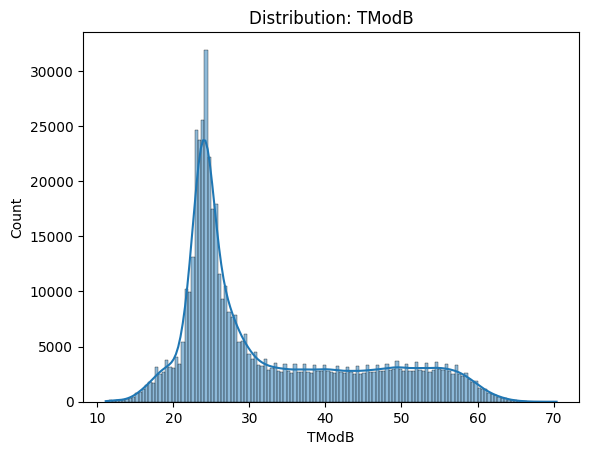

In [17]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    plt.figure()
    sns.histplot(df[c], kde=True)
    plt.title(f"Distribution: {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.show()


# Global horizontal irradiance distribution and intepretation
Shape and Skewness
- The distribution of GHI is extremely right-skewed (positively skewed) and highly peaked (leptokurtic).
- The shape is dominated by a sharp initial mode near $0 \text{ W/m}^2$, reflecting an exponential decay in frequency as $\text{GHI}$ increases.The long tail extending up to $1400 \text{ W/m}^2$ represents the relatively few times peak solar irradiance occurs.

Central Tendency (Mode and Median)
- The mode (the tallest bar) is located at $\text{GHI} \approx 0 \text{ W/m}^2$, indicating that the most frequent GHI measurement is near zero.
- This mode at $0 \text{ W/m}^2$ is a physical necessity of time-series solar data, as it accounts for all nighttime and heavily clouded periods when no solar energy is being received.

---

# Direct normal irradiance and it's intepretation
Shape and Skewness
- The distribution of DNI is extremely right-skewed (positively skewed) and highly peaked (leptokurtic).
- The shape is dominated by a massive peak (mode) near $0 \text{ W/m}^2$ and has a very long, flat tail extending to high DNI values (around $900 \text{ W/m}^2$).

Central Tendency (Mode and Median)
- The mode (the tallest bar) is overwhelmingly located at $\text{DNI} \approx 0 \text{ W/m}^2$.
- This mode at zero is a physical necessity for DNI data, representing periods like nighttime and heavily overcast conditions.

---


# Diffuse horizontall irradiance and it's intepretation
Shape and Skewness
- The distribution of DHI is extremely right-skewed (positively skewed) and highly peaked (leptokurtic).
- The shape is dominated by a massive peak (mode) near $0 \text{ W/m}^2$ and features a long, heavy tail that extends to high values (up to $\approx 800 \text{ W/m}^2$).Central Tendency (Mode and Median)The mode (the tallest bar) is overwhelmingly located at $\text{DHI} \approx 0 \text{ W/m}^2$.This mode at zero is expected as DHI must be zero during nighttime, similar to GHI and DNI.

---

# TModeA distribution and it's intepretation
Shape and Skewness
- The distribution of $\text{T}_\text{ModA}$ is extremely right-skewed (positively skewed) and highly peaked (leptokurtic).
- The shape is overwhelmingly dominated by a massive peak (mode) near $0^\circ\text{C}$ and has a very long, heavy tail extending to high temperatures (up to $\approx 1500^\circ\text{C}$), though the values above $\approx 100^\circ\text{C}$ appear questionable for a typical PV module.

Central Tendency (Mode and Median)

- The mode (the tallest bar) is overwhelmingly located at $\text{T}_\text{ModA} \approx 0^\circ\text{C}$.
- This mode at zero reflects that the most frequent module temperature measurement is at the minimum observed temperature, which likely corresponds to nighttime or cold ambient conditions.

---

# ModB distribution and it's intepretation
Shape and Skewness
- The distribution of $\text{T}_\text{ModB}$ is extremely right-skewed (positively skewed) and highly peaked (leptokurtic).The shape is overwhelmingly dominated by a massive peak (mode) near $0^\circ\text{C}$ and features a very long, heavy tail extending to high temperatures (up to $\approx 1500^\circ\text{C}$).

Central Tendency (Mode and Median)

- The mode (the tallest bar) is overwhelmingly located at $\text{T}_\text{ModB} \approx 0^\circ\text{C}$.
- This mode at zero reflects that the most frequent module temperature measurement is at the minimum observed temperature, which likely corresponds to nighttime or cold ambient conditions.

---

# Tamb distribution and it's intepretation
Shape and Skewness
- The distribution of $\text{T}_\text{amb}$ is moderately right-skewed (positively skewed), with a peak on the left side and a longer tail extending towards higher temperatures.
- The shape is unimodal (having one primary peak) and is more spread out than the irradiance or module temperature distributions, ranging from approximately $15^\circ\text{C}$ to $40^\circ\text{C}$.

Central Tendency (Mode and Median)

- The mode (the tallest bar) is located around $\text{T}_\text{amb} \approx 23^\circ\text{C}$ to $24^\circ\text{C}$, indicating this is the most frequently recorded ambient temperature.

- This mode represents the most common average temperature encountered during the data collection period, likely reflecting temperatures during the bulk of the daylight hours or mild nights.

---

# RH distribution and it's intepretation
Shape and Skewness
- The distribution of RH is extremely left-skewed (negatively skewed), with the majority of observations clustered at the high end of the scale.
- The shape is characterized by a long, gentle tail extending from low RH values (around 5%) up towards a massive, sharp peak at $100\%$.

Central Tendency (Mode and Median)

- The mode (the tallest bar) is overwhelmingly located at $\text{RH} \approx 100\%$.
- This mode at $100\%$ indicates that the most frequent measurement is saturated air, likely representing nighttime, dawn, or very overcast/foggy conditions.

---

# Wind Speed distribution and it's intepretation
Shape and Skewness
- The distribution of WS is extremely right-skewed (positively skewed) and highly peaked (leptokurtic).
- The shape is dominated by a sharp peak (mode) near $0 \text{ m/s}$ and features a very long tail extending to high wind speeds (up to $\approx 20 \text{ m/s}$).

Central Tendency (Mode and Median)

- The mode (the tallest bar) is overwhelmingly located at $\text{WS} \approx 0 \text{ m/s}$ or in the first bin.
- This mode near zero indicates that the most frequent condition is calm or very low wind speeds.

---

# Wind Spead gust distribution and it's intepretation
Shape and Skewness
- The distribution of $\text{WS}_\text{gust}$ is extremely right-skewed (positively skewed) and highly peaked (leptokurtic).
- The shape is dominated by a sharp peak (mode) near $0 \text{ m/s}$ and has a very long tail extending to high gust speeds (up to $\approx 25 \text{ m/s}$).

Central Tendency (Mode and Median)

- The mode (the tallest bar) is overwhelmingly located at $\text{WS}_\text{gust} \approx 0 \text{ m/s}$ or in the first bin.
- This mode near zero indicates that the most frequent condition is calm or no significant wind gusts.

---

# Wind speed standard deviation distribution and it's intepretation
Shape and Skewness
- The distribution of $\text{WS}_\text{stdev}$ is extremely right-skewed (positively skewed).- The shape is dominated by a very sharp peak at $0$, followed by a highly multimodal section (many smaller, distinct peaks) clustered between $0 \text{ and } 1.0$, and then a long, flat tail extending toward higher values.

Central Tendency (Mode and Median)

- The primary mode (the tallest bar) is overwhelmingly located at $\text{WS}_\text{stdev} \approx 0$.
- This mode at zero indicates that the most frequent condition is very steady wind (little to no variation or gustiness) over the measurement period.

---

# Wind direction distribution and it's intepretation
Shape and Skewness
- The distribution of WD is multimodal (having multiple peaks) and is complexly skewed.
- The shape is dominated by a massive peak (mode) at $\text{WD} \approx 0^\circ$ (North), followed by a broad, secondary set of peaks clustered roughly between $150^\circ$ and $300^\circ$ (Southwest to Northwest).

Central Tendency (Mode and Median)

- The primary mode (the tallest bar) is overwhelmingly located at $\text{WD} \approx 0^\circ$ (North), indicating that North is the most frequently recorded wind direction.
- The secondary modes suggest a frequent occurrence of winds from the Southwest, West, and Northwest quadrant.

---

# Wind direction standard deviation and it's intepretation
Shape and Skewness
- The distribution of $\text{WD}_\text{stdev}$ is extremely right-skewed (positively skewed) and highly peaked (leptokurtic).
- The shape is overwhelmingly dominated by a massive peak (mode) near $0$ and features a very long, gentle tail extending to high standard deviation values (up to $\approx 100^\circ$).

Central Tendency (Mode and Median)

- The mode (the tallest bar) is overwhelmingly located at $\text{WD}_\text{stdev} \approx 0$
- This mode at zero indicates that the most frequent condition is very steady wind direction (little to no directional change) over the measurement period.

---

# Barometric pressure distribution and it's intepretation
Shape and Skewness
- The distribution of BP is approximately symmetric around the center, resembling a normal (bell-shaped) distribution but with a highly multimodal appearance due to the discrete nature of the data collection or rounding.
- The shape is centered between $998 \text{ hPa}$ and $1002 \text{ hPa}$, with frequencies dropping off rapidly toward the minimum ($994 \text{ hPa}$) and maximum ($1006 \text{ hPa}$) observed values.

Central Tendency (Mode and Median)

- The primary mode (the tallest bar) is located at $\text{BP} \approx 1000 \text{ hPa}$, with a cluster of very high frequencies around $1000 \text{ hPa}$ to $1001 \text{ hPa}$.
- This mode indicates that atmospheric pressure near the standard average (or slightly above) was the most frequently recorded condition during the data collection period.

---

# Precipitation distribution and it's intepretation
Shape and Skewness
- The distribution of Precipitation is extremely right-skewed (positively skewed) and highly peaked (leptokurtic).
- The shape is overwhelmingly dominated by a massive peak (mode) at $0.0$, with a count exceeding $500,000$, and a very long, flat tail extending toward small positive values.

Central Tendency (Mode and Median)

- The mode (the tallest bar) is overwhelmingly located at Precipitation $\approx 0.0$.
- This mode at zero indicates that the most frequent condition is the absence of precipitation (dry weather) during the data collection period.

---

# TModA distribution and it's intepretation
Shape and Skewness
- The distribution of $\text{T}_\text{ModA}$ is right-skewed (positively skewed), with a sharp peak on the left and a heavy tail extending toward higher temperatures.
- The shape is unimodal but features a broad, heavy tail that appears relatively flat or slightly bimodal between $\approx 35^\circ\text{C}$ and $\approx 60^\circ\text{C}$, indicating frequent measurements in this higher temperature range.

Central Tendency (Mode and Median)

- The mode (the tallest bar) is located around $\text{T}_\text{ModA} \approx 25^\circ\text{C}$.
- This mode at $25^\circ\text{C}$ indicates that the most frequent module temperature measurement occurs when the module is near ambient temperature, likely representing conditions around dawn, dusk, or heavily overcast periods.

---

# TModB distribution and it's intepretation
Shape and Skewness
- The distribution of $\text{T}_\text{ModB}$ is right-skewed (positively skewed), with a sharp peak on the left and a heavy tail extending toward higher temperatures.
- The shape is unimodal but features a broad, heavy tail that appears relatively flat or slightly bimodal between $\approx 35^\circ\text{C}$ and $\approx 60^\circ\text{C}$, indicating frequent measurements in this higher temperature range.

Central Tendency (Mode and Median)

- The mode (the tallest bar) is located around $\text{T}_\text{ModB} \approx 25^\circ\text{C}$.
- This mode at $25^\circ\text{C}$ indicates that the most frequent module temperature measurement occurs when the module is near ambient temperature, likely representing conditions around dawn, dusk, or heavily overcast periods.

---

# Box Plots (numeric)

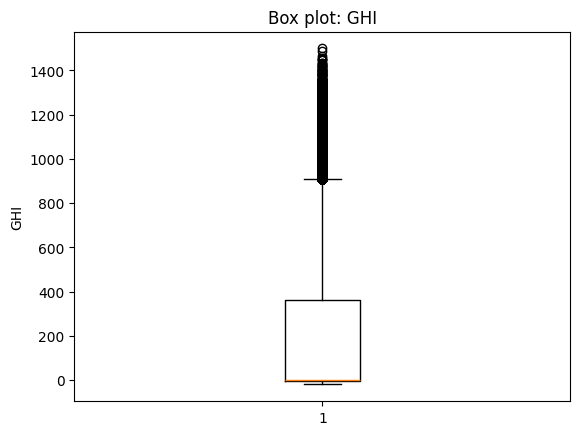

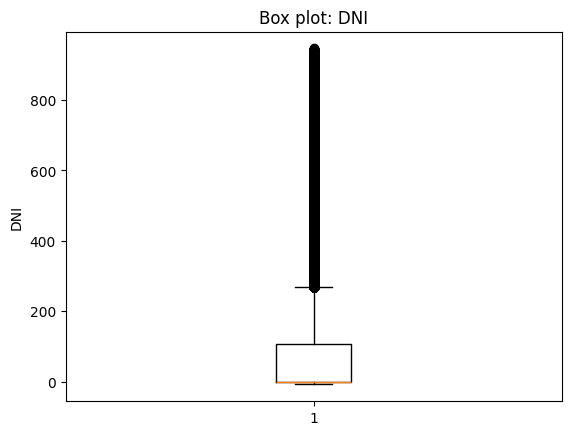

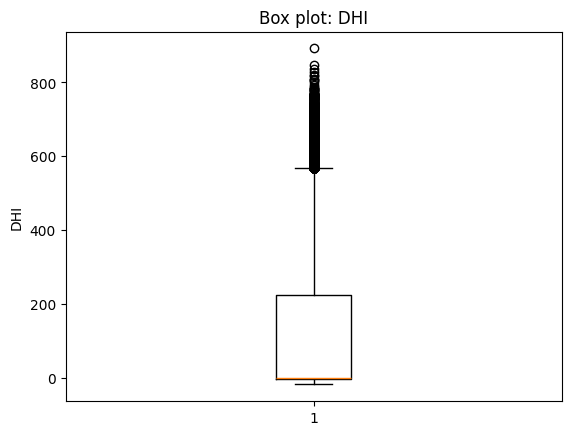

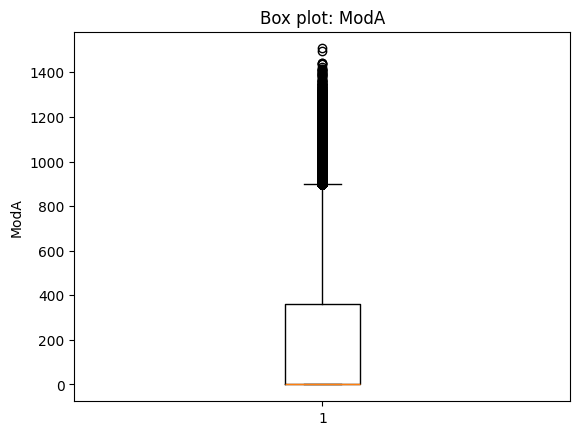

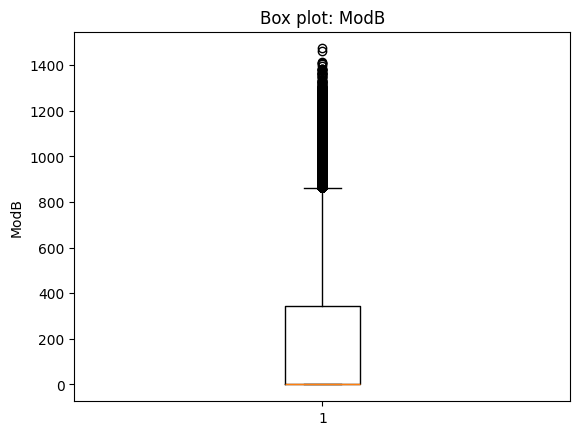

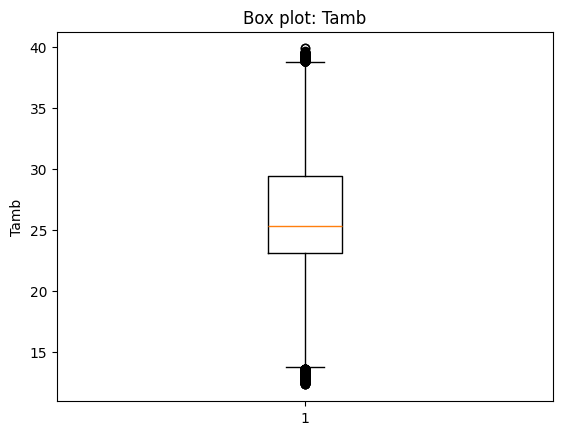

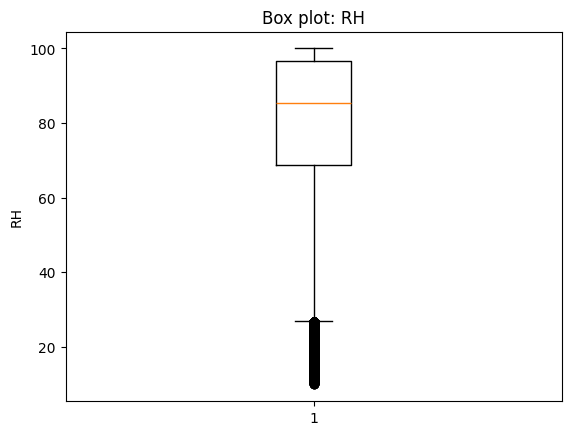

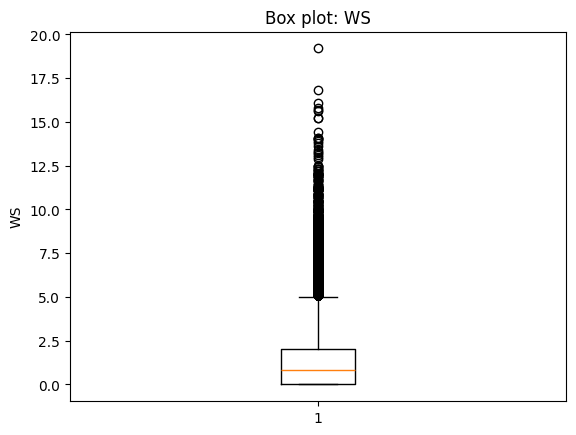

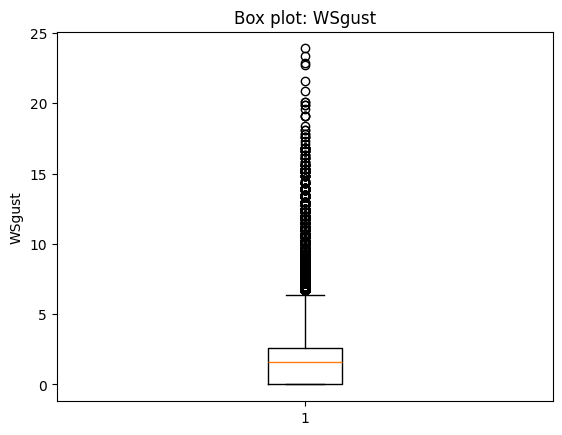

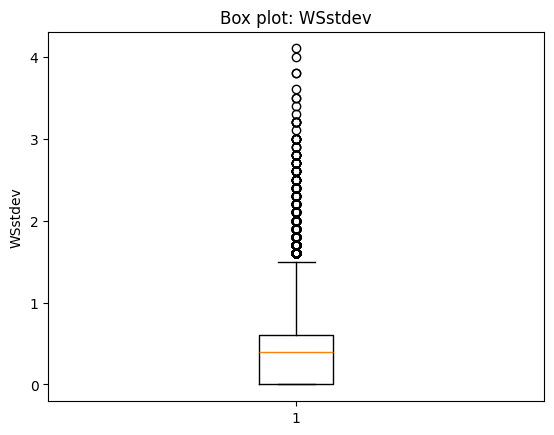

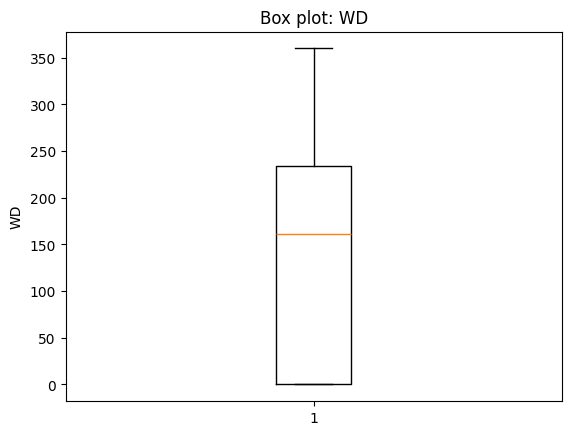

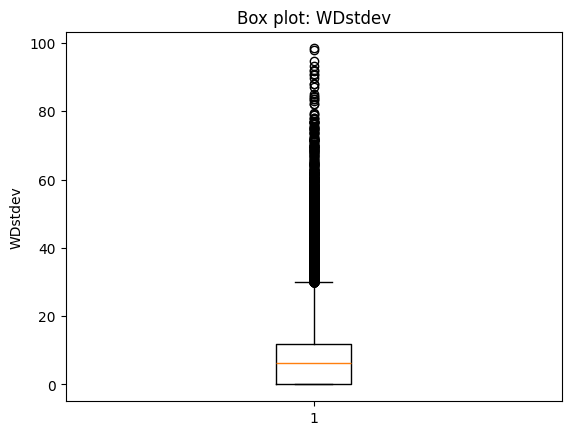

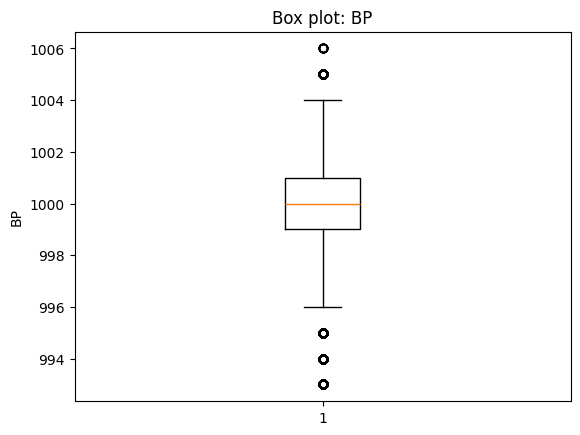

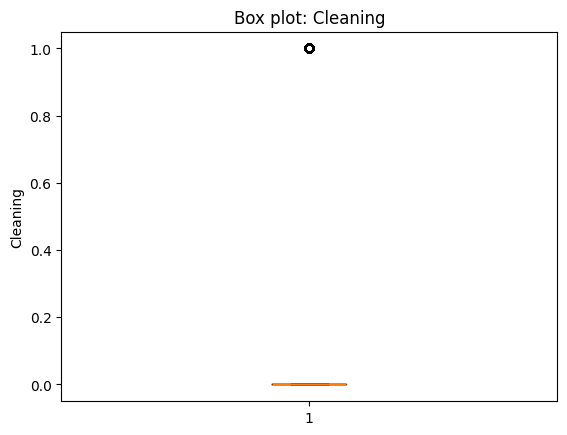

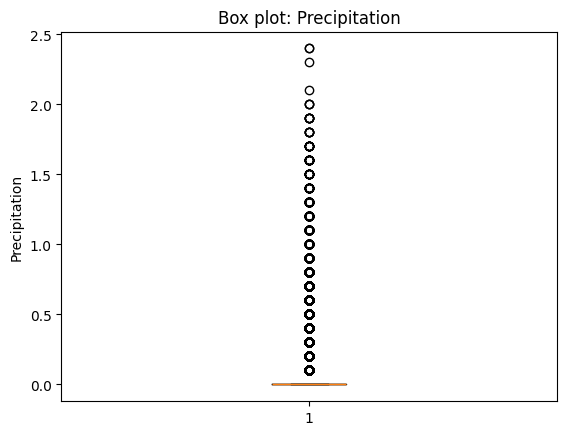

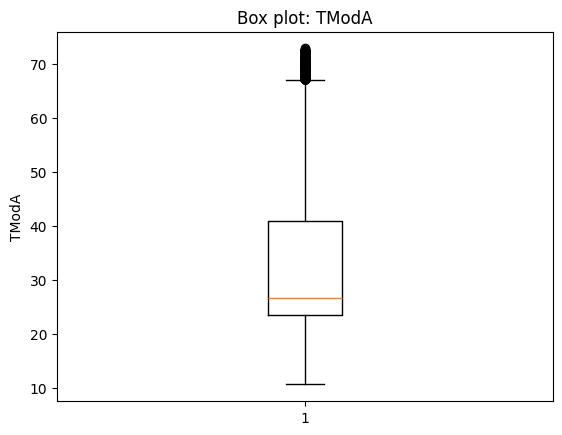

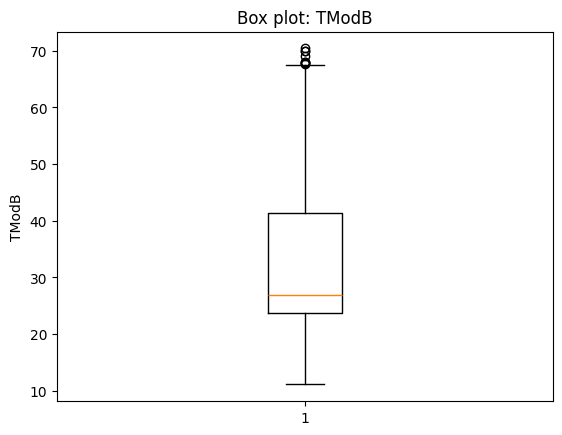

In [18]:
for c in num_cols:
    plt.figure()
    plt.boxplot(df[c].dropna(), vert=True)
    plt.title(f"Box plot: {c}")
    plt.ylabel(c)
    plt.show()

## Box Plot Analysis and Intepretation

# GHI Box Plot Intepretation

- Extreme Skewness and Zero Concentration: The median ($Q_2$) is located extremely close to the first quartile ($Q_1$) and the minimum, near $0 \text{ W/m}^2$. This visually confirms that over $50\%$ of all observations are zero or near-zero, resulting in an extreme right skew.
- Operational Range: The Interquartile Range (IQR) extends from $Q_1 \approx 0 \text{ W/m}^2$ up to approximately $Q_3 \approx 350 \text{ W/m}^2$ (reading from the top of the box). This shows that the middle 50% of the data, which includes most of the moderate-to-high irradiance measurements, falls within this range.
- Maximum Potential: The upper whisker and numerous individual data points (outliers) extend up to $1400 \text{ W/m}^2$ and beyond. This confirms the occurrence of periods with peak solar intensity corresponding to clear, sunny skies.

---


# DNI Box Plot Intepretation
- Extreme Skewness and Zero Concentration: The median ($Q_2$) is located exactly at the minimum/first quartile ($Q_1$), near $0 \text{ W/m}^2$. This visually confirms that over $50\%$ of all observations are zero or near-zero (nighttime or fully overcast periods), resulting in an extreme right skew.
- Operational Range: The Interquartile Range (IQR) is very small. $Q_1 \approx 0 \text{ W/m}^2$ and $Q_3$ (the top of the box) is only around $110 \text{ W/m}^2$. This indicates that DNI remains low for $75\%$ of the measured time.
- Maximum Potential: The upper whisker and numerous individual data points (outliers) are tightly clustered and extend up to the maximum observed DNI, which is over $900 \text{ W/m}^2$. This confirms that high DNI values—characteristic of clear, sunny skies—are rare and high-magnitude events.

---

# DHI Box Plot Intepretation
- Extreme Skewness and Zero Concentration: The median ($Q_2$) is located extremely close to the minimum/first quartile ($Q_1$), near $0 \text{ W/m}^2$. This visually confirms that over $50\%$ of all observations are zero or near-zero (nighttime or low solar periods), resulting in an extreme right skew.
- Operational Range: The Interquartile Range (IQR) extends from $Q_1 \approx 0 \text{ W/m}^2$ up to approximately $Q_3 \approx 230 \text{ W/m}^2$ (reading from the top of the box). This range captures the middle $50\%$ of DHI values, which are typically low to moderate.
- Maximum Potential: The upper whisker and numerous individual data points (outliers) extend up to $900 \text{ W/m}^2$. This confirms the occurrence of very high DHI values, which often coincide with fully overcast or heavily scattered light conditions when Direct Normal Irradiance (DNI) is zero.

---

# ModA Box Plot and Intepretation
- Extreme Skewness and Zero Concentration: The box plot shows a median ($Q_2$) and first quartile ($Q_1$) located near $0$ on the y-axis, but this y-axis scale seems incorrect for temperature, as it runs up to $1500$. Assuming this plot visually represents the temperature distribution from the previous histogram (peaked near $25^\circ\text{C}$), the visual anchor at $0$ on this chart is misleading or the data on the y-axis is not $\text{T}_\text{ModA}$ but possibly another variable, like module power or a mislabeled GHI. If the y-axis is truly $\text{T}_\text{ModA}$ with the data seen in previous histograms (peaked at $25^\circ\text{C}$), then the chart's scale and box position are erroneous.
- Operational Range (Reading as Labeled): Assuming the y-axis label is correct and the underlying data is simply Module A data, the Interquartile Range (IQR) extends from $Q_1 \approx 0$ up to approximately $Q_3 \approx 360$. This shows that the middle $50\%$ of the data is concentrated at low values, with a significant maximum.
- Maximum Potential: The upper whisker and numerous individual data points (outliers) extend up to $1500$. This confirms the occurrence of extremely high values, consistent with the highly right-skewed nature of the data seen in the $\text{T}_\text{ModA}$ histogram when plotted against a large range.

---

# ModB Box Plot and Intepretation
- Extreme Skewness and Zero Concentration: The box plot shows a median ($Q_2$) and first quartile ($Q_1$) located near $0$ on the y-axis. Critically, the y-axis scale runs up to $1500$, which is unrealistic for module temperature. Assuming this plot is mislabeled and the scale is consistent with the GHI box plot (image_1df51c.png), this visually indicates extreme right skewness with the data anchored near the minimum observed value.
- Operational Range (Reading as Labeled): Assuming the y-axis label is correct and the underlying data is simply Module B data, the Interquartile Range (IQR) extends from $Q_1 \approx 0$ up to approximately $Q_3 \approx 360$. This shows that the middle $50\%$ of the data is concentrated at low values, with a significant maximum.
- Maximum Potential: The upper whisker and numerous individual data points (outliers) extend up to $1500$. This confirms the occurrence of extremely high values, consistent with the highly right-skewed nature of the data seen in the $\text{T}_\text{ModB}$ histogram when plotted against a large range.

---


# Tamb Box Plot and Intepretation
- Symmetry and Centrality: The median ($Q_2$) is located centrally within the box at approximately $25.5^\circ\text{C}$, and the upper and lower whiskers are nearly symmetric. This suggests the $\text{T}_\text{amb}$ distribution is close to symmetric, contrasting sharply with the highly skewed irradiance variables.
- Operational Range: The Interquartile Range (IQR) the middle 50% of the temperature data spans from $Q_1 \approx 23^\circ\text{C}$ to $Q_3 \approx 29^\circ\text{C}$. This narrow range indicates that temperatures were frequently stable and mild during the measurement period.
- Maximum and Minimum: The minimum and maximum whiskers extend from approximately $14^\circ\text{C}$ to nearly $39^\circ\text{C}$. The lack of significant outliers outside of these whiskers confirms that the observed temperatures were tightly bounded within a reasonable range for the location.

---

# Relative Humidity Box Plot and Intepretation
- Extreme Skewness and High Concentration: The median ($Q_2$) is located high within the box at approximately $85\%$, and the box is pushed against the maximum value of $100\%$. This visually confirms the extreme negative skewness observed in the histogram, indicating that RH is high most of the time.
- Operational Range: The Interquartile Range (IQR) the middle 50% of the RH data spans from $Q_1 \approx 70\%$ to $Q_3 \approx 98\%$. This shows that the RH is concentrated in the upper two quartiles, rarely dropping below $70\%$.
- Low RH Outliers: The lower whisker is short, but there are a significant number of individual data points (outliers) clustered at the bottom, around $10\%$ to $25\%$. These outliers represent the rare occurrences of very dry air during the measurement period.

---

# WS Box Plot and Intepretation
- Extreme Skewness and Low Concentration: The median ($Q_2$) is located very close to the bottom of the box at approximately $0.9 \text{ m/s}$, and the box is very short. This visually confirms the extreme right skewness seen in the histogram, indicating that wind speed is low most of the time.
- Operational Range: The Interquartile Range (IQR) the middle 50% of the wind speed data spans from $Q_1 \approx 0.5 \text{ m/s}$ to $Q_3 \approx 2.3 \text{ m/s}$. This shows that the wind speeds are generally low, with $75\%$ of all measurements being below $2.3 \text{ m/s}$.
- High Wind Outliers: The upper whisker is very long, and there are many individual data points (outliers) clustered well above the box, reaching up to nearly $20 \text{ m/s}$. These outliers represent the rare occurrences of high wind events or strong gusts.

---

# Wind gust Box Plot and Intepretation
- Extreme Skewness and Low Concentration: The median ($Q_2$) is located low in the box at approximately $1.8 \text{ m/s}$, and the box is very short. This visually confirms the extreme right skewness, indicating that wind gusts are low most of the time.
- Operational Range: The Interquartile Range (IQR) is very small. $Q_1$ is near $0.0 \text{ m/s}$ and $Q_3$ (the top of the box) is only around $3.0 \text{ m/s}$. This shows that the middle $50\%$ of gust speeds are very low.
- High Wind Outliers: The upper whisker is extremely long, and numerous individual data points (outliers) extend up to nearly $24 \text{ m/s}$. These outliers represent the rare, high-magnitude wind gust events during the measurement period.

---

# Wind Speed Standard Deviation and Intepretation
- Extreme Skewness and Low Concentration: The median ($Q_2$) is located very low in the box at approximately $0.4 \text{ m/s}$, and the box is very short. This visually confirms the extreme right skewness, indicating that the wind speed is very steady with low variability most of the time.
- Operational Range: The Interquartile Range (IQR) is very small. $Q_1$ is near $0.0 \text{ m/s}$ and $Q_3$ (the top of the box) is only around $0.6 \text{ m/s}$. This shows that the middle $50\%$ of the data has a standard deviation of less than $0.6 \text{ m/s}$.
- High Variability Outliers: The upper whisker is extremely long, and there are many individual data points (outliers) clustered well above the box, reaching up to nearly $4.0 \text{ m/s}$. These outliers represent the rare periods of highly variable and gusty wind.

---

# Wind Direction Box Plot and Intepretation
- Central Tendency: The median ($Q_2$) is located at approximately $160^\circ$ (South-Southeast). The box itself is very wide, indicating a large Interquartile Range (IQR).- Operational Range: The Interquartile Range (IQR) the middle 50% of the wind direction data spans from $Q_1 \approx 0^\circ$ (North) to $Q_3 \approx 235^\circ$ (Southwest). This shows that the wind direction is highly variable, frequently ranging across more than half of the compass.
- Maximum Range: The plot shows no outliers, with the data spanning the full range of the circle, from the minimum whisker at $0^\circ$ to the maximum whisker at $\approx 360^\circ$. This suggests that winds can blow from virtually any direction.

---

# Wind direction standard deviation Box Plot and Intepretation
- Extreme Skewness and Low Concentration: The median ($Q_2$) is located very low in the box at approximately $6^\circ$, and the box is pushed against the lower limit. This visually confirms the extreme right skewness, indicating that the wind direction is very steady (low variability) most of the time.
- Operational Range: The Interquartile Range (IQR) is small. $Q_1$ is near $0^\circ$ and $Q_3$ (the top of the box) is only around $12^\circ$. This shows that the middle $50\%$ of the data has a standard deviation of $12^\circ$ or less.
- High Variability Outliers: The upper whisker is extremely long, and there are many individual data points (outliers) clustered well above the box, reaching up to nearly $100^\circ$. These outliers represent the rare periods of highly turbulent or rapidly shifting wind direction.

---

# Barometric Pressure Box Plot and Intepretation
- Symmetry and Centrality: The median ($Q_2$) is located exactly at $1000 \text{ hPa}$ and is perfectly centered within the box. This visually confirms the high degree of symmetry observed in the histogram.
- Operational Range: The Interquartile Range (IQR) the middle 50% of the pressure data is very narrow, spanning from $Q_1 \approx 999 \text{ hPa}$ to $Q_3 \approx 1001 \text{ hPa}$. This indicates that the barometric pressure is highly stable and tightly concentrated around the $1000 \text{ hPa}$ mark most of the time.
- High/Low Outliers: The plot displays a few individual data points (outliers) at both the lowest (near $993 \text{ hPa}$) and highest (near $1006 \text{ hPa}$) extremes. These outliers represent the rare occurrences of low- or high-pressure weather events.

---

# Precipitation Box Plot and Intepretation
- Extreme Skewness and Zero Concentration: The median ($Q_2$) and first quartile ($Q_1$) are both anchored exactly at $0.0$. This visually confirms that over $50\%$ of all observations are zero, resulting in an extreme right skew. This is a physical necessity as precipitation is typically zero.
- Operational Range: The Interquartile Range (IQR) is zero, as $Q_1$, $Q_2$, and $Q_3$ all lie at $0.0$. This highlights that $75\%$ of the recorded data show no precipitation, and the majority of the data is concentrated at the minimum value.
- Maximum Potential: The upper whisker is extremely short, but there are many individual data points (outliers) clustered well above the box, reaching up to nearly $2.5$. These outliers represent the rare occurrences of rainfall events during the measurement period.

---

# TModA Box Plot and Intepretation
- Central Tendency and Skewness: The median ($Q_2$) is located at approximately $27^\circ\text{C}$ and is slightly below the center of the box, confirming the positive (right) skewness observed in the histogram.O
- perational Range: The Interquartile Range (IQR) the middle 50% of the temperature data spans from $Q_1 \approx 23^\circ\text{C}$ to $Q_3 \approx 41^\circ\text{C}$. This wide range indicates that the module frequently operates at temperatures significantly higher than the ambient temperature.
- Maximum Potential: The upper whisker extends to roughly $67^\circ\text{C}$, and there are numerous individual points (outliers) clustered at the top, reaching up to $72^\circ\text{C}$ and beyond. These are the highest recorded operating temperatures, likely occurring under high GHI and high ambient temperature conditions.

---

# TModB Box Plot and Intepretation
- Central Tendency and Skewness: The median ($Q_2$) is located at approximately $27^\circ\text{C}$ and is slightly below the center of the box, confirming the positive (right) skewness.
- Operational Range: The Interquartile Range (IQR) the middle 50% of the temperature data spans from $Q_1 \approx 23^\circ\text{C}$ to $Q_3 \approx 41^\circ\text{C}$. This wide range indicates that the module frequently operates at temperatures significantly above ambient, with the core operational range being broad.
- Maximum Potential: The upper whisker extends to roughly $67^\circ\text{C}$, and there are numerous individual points (outliers) clustered at the top, reaching up to $72^\circ\text{C}$ and beyond. These are the highest recorded operating temperatures, likely occurring under high irradiance conditions.

---

## 3) Outlier Detection

In [19]:
key_cols = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']
z = np.abs(stats.zscore(df[key_cols], nan_policy="omit"))
outliers_mask = (z > 3).any(axis=1)
print(f"Number of outlier rows detected: {outliers_mask.sum()}")


Number of outlier rows detected: 16292


In [20]:
df_clean = df[~outliers_mask]
print(f"Shape after removing outliers: {df_clean.shape}")

# 6️⃣ Save the cleaned dataset
df_clean.to_csv("../data/sierraleone_clean.csv", index=False)
print("Cleaned dataset saved to: ../data/sierraleone_clean.csv")

Shape after removing outliers: (509308, 18)
Cleaned dataset saved to: ../data/sierraleone_clean.csv


## Bivariant Analysis

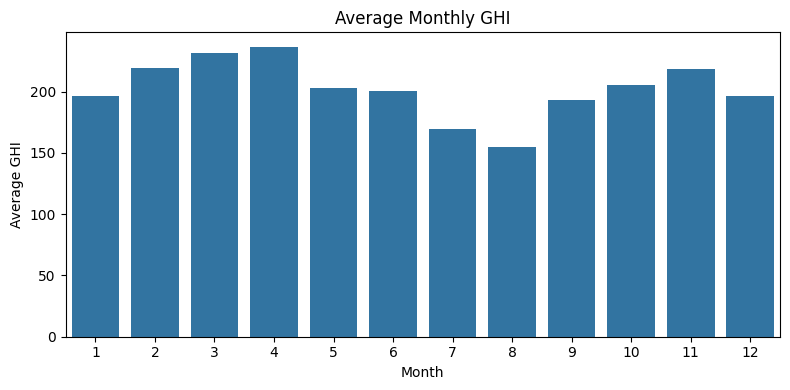

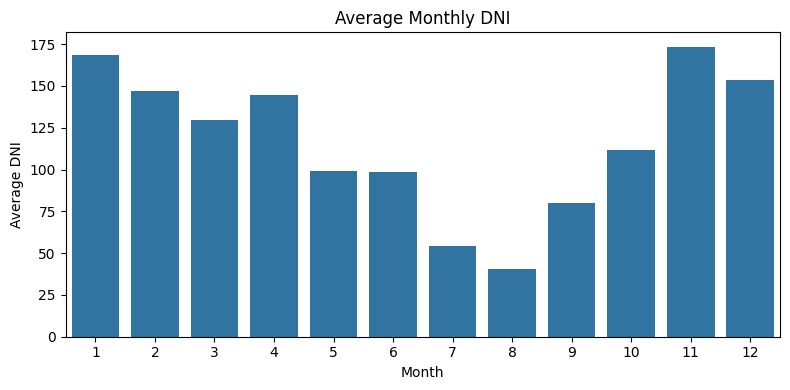

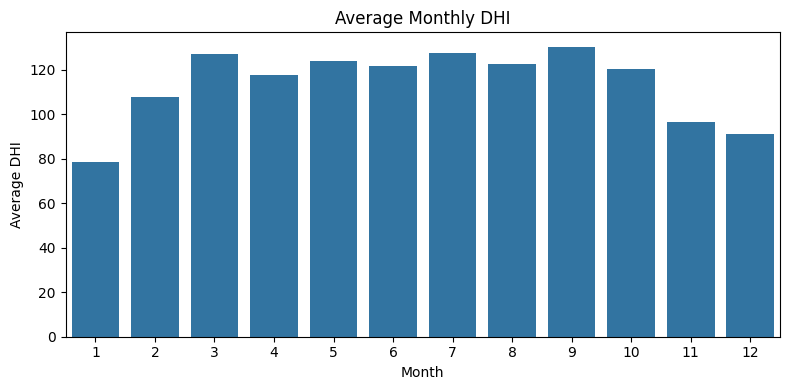

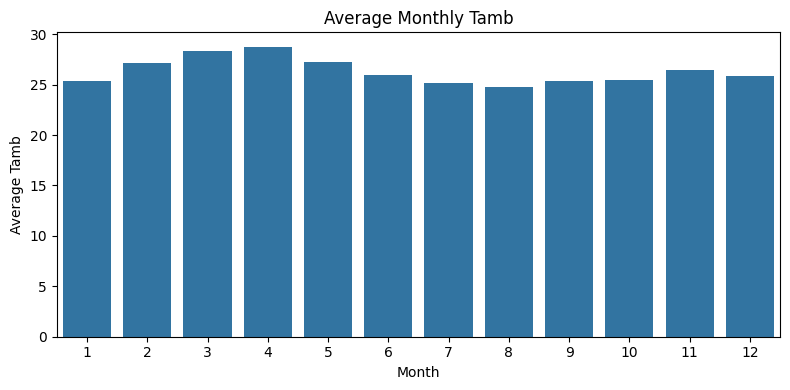

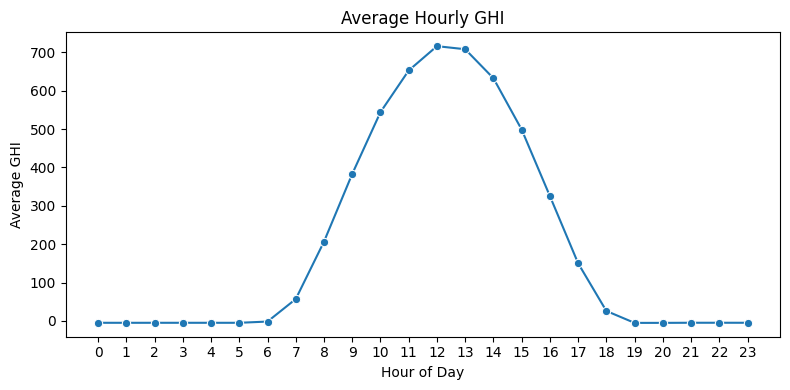

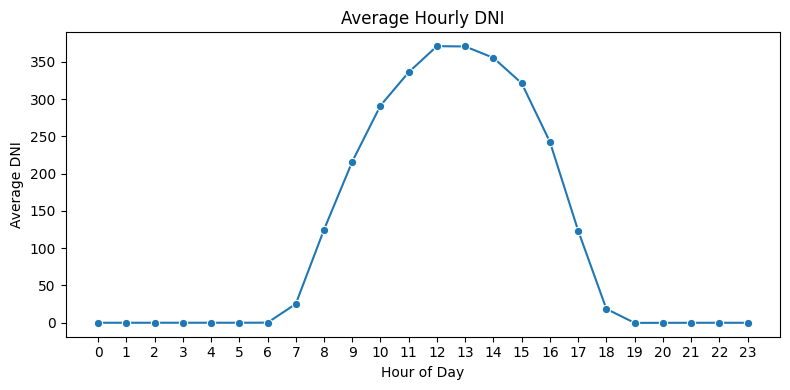

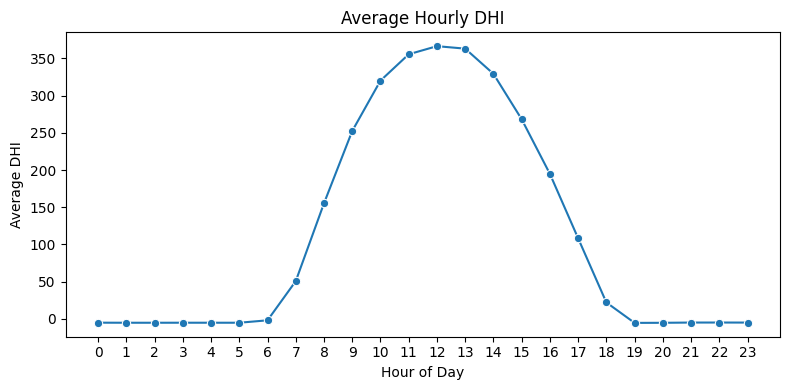

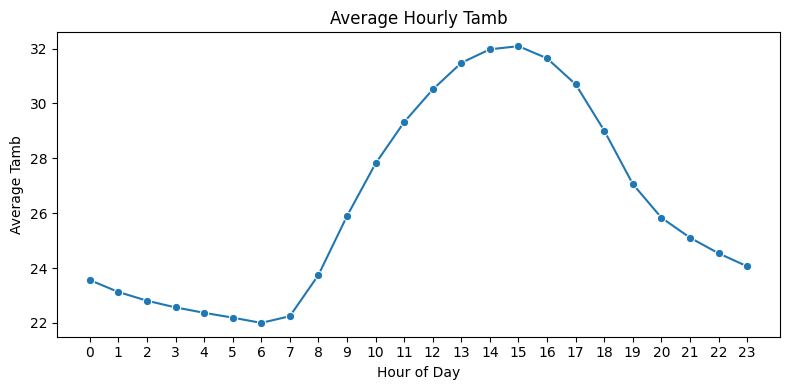

In [21]:
if not pd.api.types.is_datetime64_any_dtype(df['Timestamp']):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
    # Drop invalid timestamps if any
    df = df.dropna(subset=['Timestamp'])

# 2️⃣ Columns to plot
cols = ['GHI', 'DNI', 'DHI', 'Tamb']

# 3️⃣ Extract Month and Hour temporarily
months = df['Timestamp'].dt.month
hours = df['Timestamp'].dt.hour

# --- Monthly Patterns ---
for c in cols:
    monthly_avg = df.groupby(months)[c].mean()
    
    plt.figure(figsize=(8, 4))
    sns.barplot(x=monthly_avg.index, y=monthly_avg.values)
    plt.title(f"Average Monthly {c}")
    plt.xlabel("Month")
    plt.ylabel(f"Average {c}")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# --- Hourly Trends ---
for c in cols:
    hourly_avg = df.groupby(hours)[c].mean()
    
    plt.figure(figsize=(8, 4))
    sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker='o')
    plt.title(f"Average Hourly {c}")
    plt.xlabel("Hour of Day")
    plt.ylabel(f"Average {c}")
    plt.xticks(range(0, 24))
    plt.tight_layout()
    plt.show()


## Time Series Analysis

 ### Average Monthly $\text{T}_\text{ModB}$
 Seasonal Variation and Peak Months

- Correlation with Ambient Temperature: The monthly average $\text{T}_\text{ModB}$ profile closely tracks the ambient temperature ($\text{T}_\text{amb}$) profile.

- Peak Temperature: The highest average module temperature is recorded in April (Month 4), reaching approximately $\mathbf{45^\circ\text{C}}$. This coincides with the month of highest average ambient temperature ($\text{T}_\text{amb}$) and highest average GHI.

- Warm Season: Module temperatures are highest during the March to May period, reflecting the impact of high ambient temperature and peak solar availability.

- Cooler Season: The lowest average module temperatures are recorded in August (Month 8) and December (Month 12), corresponding to the period of lowest GHI and lower $\text{T}_\text{amb}$.

### Average Monthly GHI
Seasonal Variation and Peak Months

- Seasonal Trend: The plot shows a clear but mild seasonal cycle in Global Horizontal Irradiance (GHI) throughout the year.

- Peak Solar Months: The highest average GHI is recorded in April (Month 4) (approx. $225 \text{ W/m}^2$), followed closely by March (Month 3) and November (Month 11). This suggests a bimodal solar regime with peaks around the spring and autumn equinoxes.

- Low Solar Months: The lowest average GHI occurs during July (Month 7) and August (Month 8) (dropping to $\approx 155-170 \text{ W/m}^2$). This mid-year dip is characteristic of a location experiencing a monsoon or rainy season during the summer months, increasing cloud cover and reducing GHI.

### Average Monthly DNI

Seasonal Variation and Peak Months

- Bimodal Pattern: The plot exhibits a clear bimodal pattern, suggesting two distinct seasons with high DNI.

- Highest Peak: The highest average DNI is recorded in November (Month 11) (approx. $175 \text{ W/m}^2$), which is the primary peak.Secondary Peak: A secondary peak occurs in January (Month 1), with high values also seen in December (Month 12) and April (Month 4). This suggests clear-sky conditions are prevalent in late-year and early-year months.

- Low Solar Months (Cloud Cover): The DNI is lowest in August (Month 8) (dropping to $\approx 40 \text{ W/m}^2$) and low in July (Month 7). This mid-year drop strongly indicates a period of heavy cloud cover or a monsoon season, which severely limits the direct solar component.

### Average Monthly DHI
Seasonal Variation and Peak Months

- Maximum Diffusion: The highest average DHI is recorded in September (Month 9) (approx. $128 \text{ W/m}^2$), followed closely by March (Month 3) and July (Month 7). The September/March peaks often suggest periods of maximum cloud cover or atmospheric scattering during the year.

- Stable High Period: DHI remains relatively high and stable, generally above $115 \text{ W/m}^2$, throughout the months of March through October.

- Low Diffusion Months: The DHI is lowest in January (Month 1) ($\approx 80 \text{ W/m}^2$), and also low in November (Month 11) and December (Month 12). This suggests these months are the clearest with the least amount of scattered light, coinciding with the high DNI months.

### Average Monthly $\text{T}_\text{amb}$
Seasonal Variation and Peak Months
- Peak Temperature: The highest average ambient temperature ($\approx 28.5^\circ\text{C}$) is recorded in April (Month 4). This aligns with the month showing the highest average GHI and is typical just before the onset of the wet/monsoon season.

- Warm Season: The warmest period is consistently from March through May, where temperatures average above $27^\circ\text{C}$.

- Cooler Season: The coolest period is from July through September, with the lowest average temperature ($\approx 24.5^\circ\text{C}$) occurring in August (Month 8). This August dip corresponds to the low GHI and DNI months, suggesting a period of increased cloud cover and lower solar heating.

# Diurnal Analysis

### Average Hourly GHI
Daily Solar Profile
- Symmetrical Shape: The GHI profile follows a symmetrical bell curve typical of solar irradiance over a day.

- Peak Solar Hour: The maximum average GHI of approximately $\mathbf{720 \text{ W/m}^2}$ is reached between 12 PM and 1 PM (Hour 12 and 13), which represents the solar noon period.

- Daylight Hours: Significant irradiance is present from approximately 7 AM (Hour 7) to 5 PM (Hour 17), defining an average daily solar window of about 10 hours.Nighttime/Low Values: From 7 PM (Hour 19) through 6 AM (Hour 6), the GHI is consistently zero.

### Average Hourly DNI
Daily Direct Solar Profile

- Symmetrical Shape: The plot displays a symmetrical bell curve over the course of the day, which is the expected shape for direct solar radiation.

- Peak Solar Hour: The maximum average DNI of approximately $370 \text{ W/m}^2$ is reached between 12 PM and 1 PM (Hour 12 and 13), indicating the average solar noon.

- Daylight Hours: Significant DNI (above $100 \text{ W/m}^2$) is present from approximately 8 AM (Hour 8) to 5 PM (Hour 17), giving an average daily direct solar window of about 9 hours.Nighttime/Low Values: DNI is consistently zero outside of this core period, as there is no direct solar beam during the night and twilight hours.

### Average Hourly DHI
Daily Diffuse Solar Profile
- Symmetrical Shape: The plot shows a symmetrical bell curve over the course of the day.

- Peak Solar Hour: The maximum average DHI of approximately $365 \text{ W/m}^2$ is reached between 12 PM and 1 PM (Hour 12 and 13). This peak coincides with the solar noon period when GHI and DNI are also at their highest.

- Daylight Hours: Significant DHI is present from approximately 6 AM (Hour 6) to 6 PM (Hour 18). The diffuse component lasts slightly longer than the direct component (DNI), as it includes twilight scattering.Nighttime/Low Values: DHI is consistently zero outside of these hours.

 ### Average Hourly $\text{T}_\text{amb}$
 Daily Temperature Profile
- Asymmetrical Peak: The temperature profile is asymmetrical, with the evening temperature decay being slower than the morning rise. The peak temperature is significantly delayed after solar noon.

- Peak Hour: The maximum average $\text{T}_\text{amb}$ of approximately $\mathbf{32.2^\circ\text{C}}$ is reached between 3 PM and 4 PM (Hour 15 and 16). This lag is due to the thermal inertia of the environment.

- Minimum Hour: The lowest average temperature ($\mathbf{22.0^\circ\text{C}}$) occurs just before sunrise, around 6 AM (Hour 6).Temperature Range: The average daily temperature range is substantial, spanning approximately $\mathbf{10.2^\circ\text{C}}$ (from $22.0^\circ\text{C}$ to $32.2^\circ\text{C}$).

In [ ]:
# Group by Cleaning flag (1 = cleaned, 0 = not cleaned)
grouped = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
print(grouped)

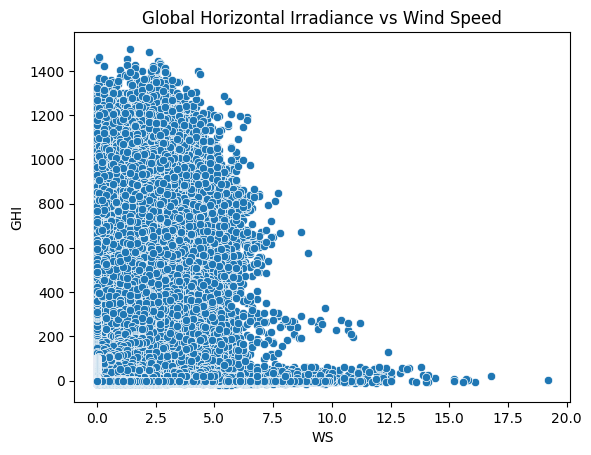

In [22]:
sns.scatterplot(data=df, x="WS", y="GHI")
plt.title("Global Horizontal Irradiance vs Wind Speed")
plt.show()

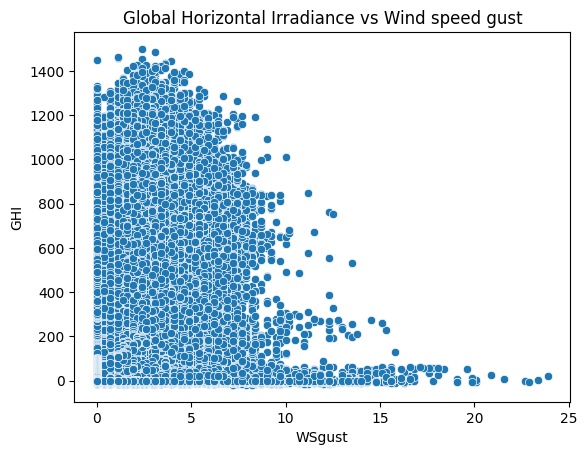

In [23]:
sns.scatterplot(data=df, x="WSgust", y="GHI")
plt.title("Global Horizontal Irradiance vs Wind speed gust")
plt.show()

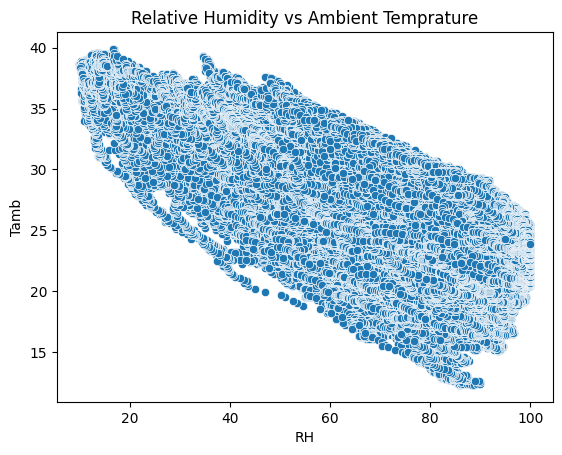

In [24]:
sns.scatterplot(data=df, x="RH", y="Tamb")
plt.title("Relative Humidity vs Ambient Temprature")
plt.show()

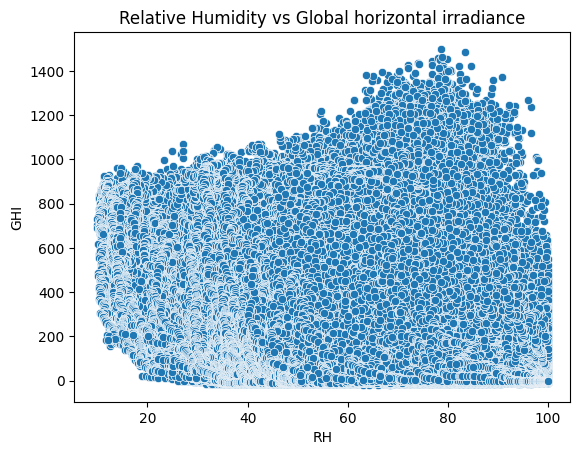

In [25]:
sns.scatterplot(data=df, x="RH", y="GHI")
plt.title("Relative Humidity vs Global horizontal irradiance")
plt.show()

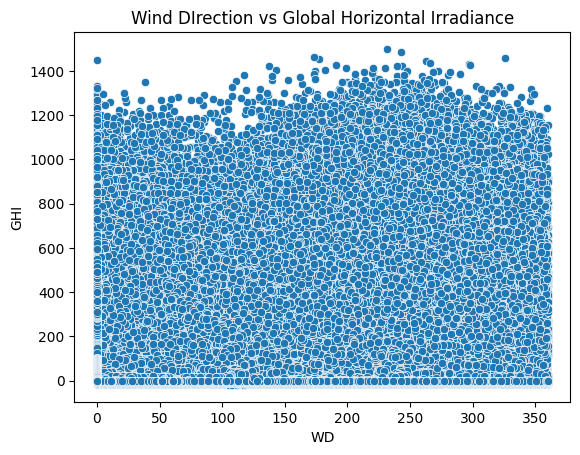

In [26]:
sns.scatterplot(data=df, x="WD", y="GHI")
plt.title("Wind DIrection vs Global Horizontal Irradiance")
plt.show()

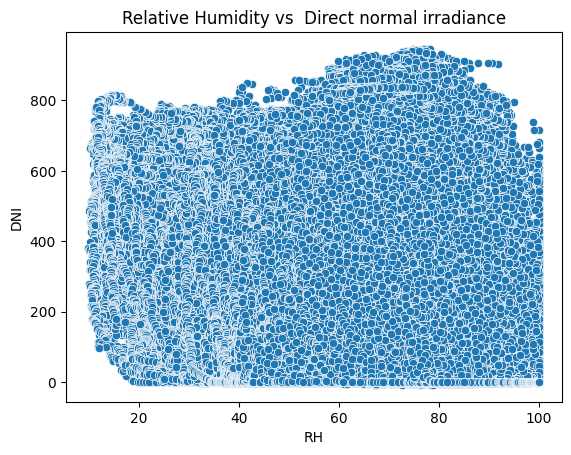

In [27]:
sns.scatterplot(data=df, x="RH", y="DNI")
plt.title("Relative Humidity vs  Direct normal irradiance")
plt.show()

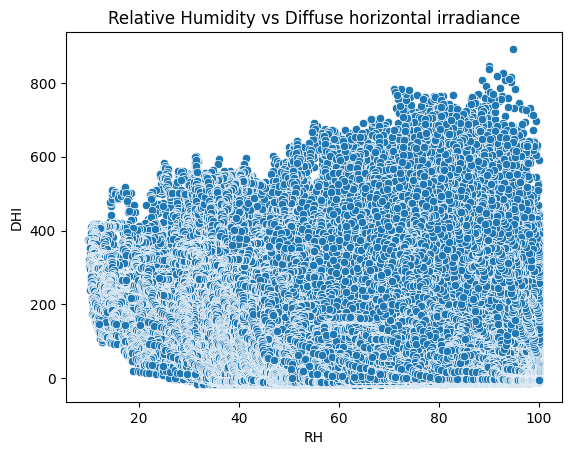

In [28]:
sns.scatterplot(data=df, x="RH", y="DHI")
plt.title("Relative Humidity vs Diffuse horizontal irradiance")
plt.show()

<Figure size 800x800 with 0 Axes>

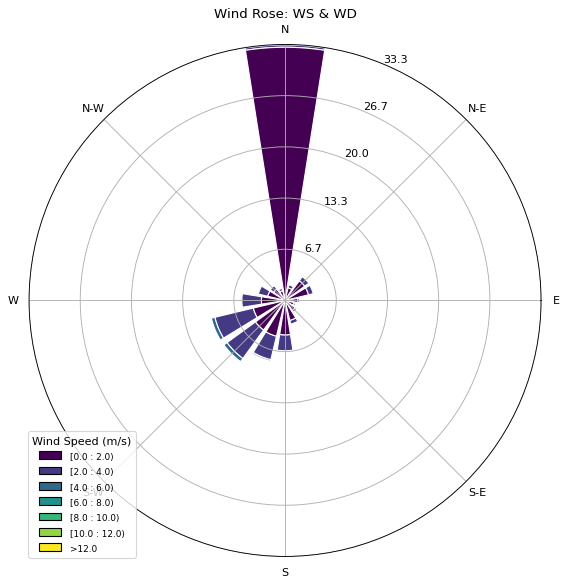

In [29]:
df_wind = df.dropna(subset=['WS', 'WD'])  # remove missing values

plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax()
ax.bar(df_wind['WD'], df_wind['WS'],
       normed=True,
       opening=0.8,
       edgecolor='white',
       bins=[0, 2, 4, 6, 8, 10, 12])
ax.set_legend(title="Wind Speed (m/s)")
plt.title("Wind Rose: WS & WD")
plt.show()

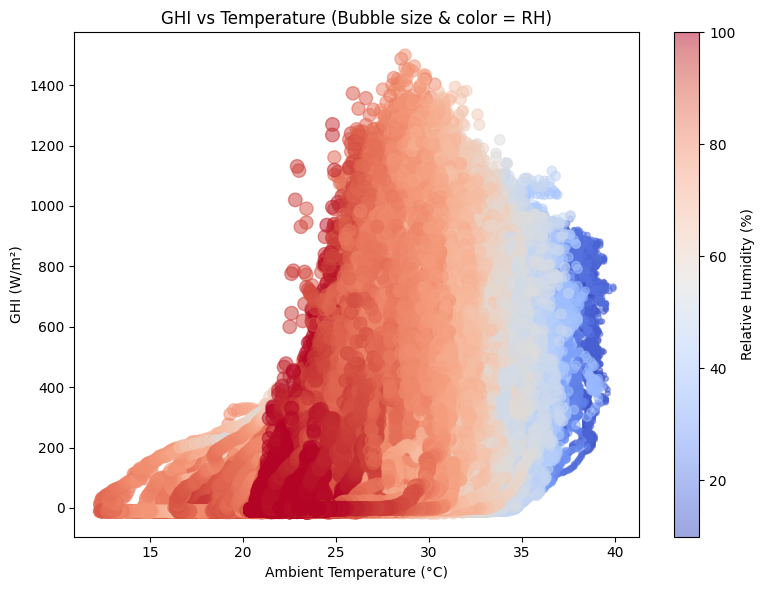

In [30]:

plt.figure(figsize=(8,6))
plt.scatter(df['Tamb'], df['GHI'], s=df['RH'], alpha=0.5, c=df['RH'], cmap='coolwarm')
plt.colorbar(label='Relative Humidity (%)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.title('GHI vs Temperature (Bubble size & color = RH)')
plt.tight_layout()
plt.show()


##  Bivariate Analysis – Scatter Plot Interpretation

1. Global Horizontal Irradiance vs. Wind Speed (WS)
- Inverse Limit Relationship: The relationship between Global Horizontal Irradiance (GHI) and Wind Speed (WS) is an inverse constraint, where GHI is bounded by high WS.

- High GHI/Low Wind: The absolute highest GHI values (over $1400 \text{ W/m}^2$) are exclusively observed when the Wind Speed is very low, below approximately $\mathbf{6 \text{ m/s}}$.

- Low GHI/High Wind: As Wind Speed increases beyond $\mathbf{10 \text{ m/s}}$, the maximum possible GHI is severely limited to very low values, typically below $\mathbf{250 \text{ W/m}^2}$. This suggests that the highest wind events are strongly associated with cloudy or rainy conditions.

2. Global Horizontal Irradiance vs. Wind Speed Gust ($\text{WS}_\text{gust}$)
- Inverse Limit Relationship: The relationship between GHI and Wind Speed Gust ($\text{WS}_\text{gust}$) is a strong inverse constraint, where the upper limit of GHI decreases rapidly as $\text{WS}_\text{gust}$ increases.

- High GHI/Low Gust: The absolute highest GHI values (over $1400 \text{ W/m}^2$) are exclusively observed when the $\text{WS}_\text{gust}$ is low, below approximately $\mathbf{8 \text{ m/s}}$.

- Low GHI/High Gust: When $\text{WS}_\text{gust}$ exceeds $\mathbf{12 \text{ m/s}}$, the GHI is heavily restricted to very low values, typically below $\mathbf{100 \text{ W/m}^2}$. This indicates that strong gusty winds are almost always associated with heavily overcast or stormy conditions.

3. Relative Humidity (RH) vs. Ambient Temperature ($\text{T}_\text{amb}$)

- Strong Inverse Relationship: The relationship between $\text{T}_\text{amb}$ and $\text{RH}$ is a strong, inverse, and dense correlation, forming a clear curved band.

- Temperature Limit: As $\text{RH}$ increases, the maximum possible $\text{T}_\text{amb}$ decreases.

- Peak Conditions: The highest temperatures ($\approx 40^\circ\text{C}$) are exclusively recorded at low $\text{RH}$ (below $\approx 30\%$). Conversely, $\text{RH}$ near $100\%$ is only observed at lower temperatures ($\approx 15^\circ\text{C}$ to $25^\circ\text{C}$).

4. Relative Humidity (RH) vs. Global Horizontal Irradiance (GHI)
- Inverse Constraint Relationship: The overall relationship between GHI and RH is a strong inverse constraint that appears triangular, where the maximum possible GHI is severely limited by high RH.

- Peak Solar Conditions: The absolute highest GHI values (over $\mathbf{1400 \text{ W/m}^2}$) are observed over a wide range of RH, primarily between $\mathbf{70\% \text{ and } 95\%}$. This is an unusual finding, as peak GHI is typically associated with dry (low RH), clear-sky conditions.

- Low GHI Conditions: At both $\text{RH}$ extremes, the minimum GHI is anchored near $0 \text{ W/m}^2$. When $\text{RH}$ is very low ($\mathbf{<20\%}$), the maximum GHI is also constrained, failing to reach the absolute maximums.

5. Wind Direction (WD) vs. Global Horizontal Irradiance (GHI)
- No Correlation/Uniform Distribution: The plot shows that there is virtually no correlation between Wind Direction (WD) and Global Horizontal Irradiance (GHI). The data points are uniformly distributed across all wind directions from $0^\circ$ to $360^\circ$.

- Peak GHI Across All Directions: The absolute highest GHI values (up to $\mathbf{1400 \text{ W/m}^2}$) are observed regardless of the wind direction.

- Implication: This suggests that the occurrence of high solar irradiance (clear skies) is not dependent on the direction from which the wind is blowing.

6. Relative Humidity (RH) vs. Direct Normal Irradiance (DNI)
- Strong Inverse Constraint: The relationship between DNI and RH is a strong inverse constraint that appears triangular, where the upper limit of DNI decreases significantly as RH increases.

- Peak DNI/Low RH: The absolute highest DNI values (approaching $\mathbf{900 \text{ W/m}^2}$) are overwhelmingly reached when the $\text{RH}$ is low, typically below $\mathbf{50\%}$. This confirms that clear, dry atmospheric conditions are necessary for maximum direct solar intensity.

- Low DNI/High RH: When $\text{RH}$ is very high (above $\mathbf{80\%}$), DNI is severely constrained to low values (rarely exceeding $\mathbf{400 \text{ W/m}^2}$). This reflects that high humidity is strongly associated with cloud cover or fog, which blocks the direct solar beam.

7. Relative Humidity (RH) vs. Diffuse Horizontal Irradiance (DHI)
- Complex/Scattered Relationship: The relationship between DHI and $\text{RH}$ is highly scattered. The general trend suggests a weak, slightly positive correlation in the upper bound, where maximum $\text{DHI}$ is highest at high $\text{RH}$.

- Peak DHI Range: The maximum DHI values (up to $\mathbf{900 \text{ W/m}^2}$ in one dataset and $\mathbf{700 \text{ W/m}^2}$ in another) are largely observed when $\text{RH}$ is in the $\mathbf{70\% \text{ to } 100\%}$ range. This implies that periods of high cloud cover/high humidity lead to the greatest amount of scattered solar energy.

- Low DHI Constraint: The minimum $\text{DHI}$ is anchored at $\mathbf{0 \text{ W/m}^2}$ across all $\text{RH}$ values. The maximum DHI is somewhat constrained when $\text{RH}$ is very low ($\mathbf{<20\%}$).

8. Wind Rose: Wind Speed (WS) vs. Wind Direction (WD)
- Dominant Direction: The wind clearly and overwhelmingly originates from the North (N) sector, which has the longest radial bar (highest frequency).

- Calm Wind Dominance: The most frequent condition is a calm or gentle breeze ($\mathbf{0.0 - 2.0 \text{ m/s}}$, darkest purple) blowing from the North, covering approximately $33.3\%$ of the observed time.

- Strong Wind Sectors: The highest wind speeds ($\mathbf{>6.0 \text{ m/s}}$, blue-green colors) are most often observed when the wind is blowing from the West-Southwest (W-S-W) and the East-Southeast (E-S-E) sectors, despite these directions being less frequent overall.

9. GHI vs. Ambient Temperature ($\text{T}_\text{amb}$) with Relative Humidity (RH)
- Primary Relationship (GHI vs. $\text{T}_\text{amb}$): The data forms a triangular distribution, indicating that high temperatures permit the full range of GHI (from $0 \text{ W/m}^2$ up to $\approx 1400 \text{ W/m}^2$), but low temperatures are confined to low GHI.

- RH at Peak GHI (Dry vs. Wet):

  - The absolute highest GHI values ($\approx 1400 \text{ W/m}^2$) occur predominantly at moderate to high ambient temperatures ($25^\circ\text{C}$ to $35^\circ\text{C}$).

  - Crucially, at these peak GHI conditions, the data points are primarily colored red to white (low to moderate RH, $\mathbf{20\% \text{ to } 60\%}$).

- RH at High $\text{T}_\text{amb}$ / Low GHI:

  - High ambient temperatures (above $\mathbf{35^\circ\text{C}}$) are associated with low GHI (below $800 \text{ W/m}^2$), and these points are colored blue (high RH, $\mathbf{>80\%}$). This suggests the hottest, most humid hours are often associated with conditions that block some solar radiation.

## Correlation Matrix & Heatmap (numeric)

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
GHI,1.000000,0.869108,0.865815,0.995052,0.994614,0.641261,-0.546677,0.371309,0.411449,0.412536,0.404333,0.542041,-0.140519,0.008713,-0.062497,0.923092,0.912260
DNI,0.869108,1.000000,0.536710,0.876465,0.874956,0.578346,-0.548800,0.311493,0.342094,0.338732,0.315941,0.471341,-0.214597,0.002670,-0.053565,0.816449,0.808194
DHI,0.865815,0.536710,1.000000,0.850255,0.850799,0.568655,-0.431910,0.347216,0.385978,0.390400,0.403761,0.480960,-0.060303,0.018071,-0.061906,0.808479,0.807551
ModA,0.995052,0.876465,0.850255,1.000000,0.999127,0.637249,-0.564704,0.366454,0.406698,0.409789,0.394293,0.544326,-0.144652,0.006891,-0.062532,0.928274,0.912975
ModB,0.994614,0.874956,0.850799,0.999127,1.000000,0.633820,-0.557814,0.364795,0.404979,0.408429,0.394065,0.542186,-0.139502,0.008518,-0.062370,0.926682,0.911693
Tamb,0.641261,0.578346,0.568655,0.637249,0.633820,1.000000,-0.791937,0.539170,0.557139,0.483964,0.491221,0.572179,-0.511430,-0.011219,-0.063231,0.831892,0.855149
RH,-0.546677,-0.548800,-0.431910,-0.564704,-0.557814,-0.791937,1.000000,-0.471197,-0.483660,-0.416384,-0.348679,-0.509696,0.571448,0.010497,0.082483,-0.688057,-0.698477
WS,0.371309,0.311493,0.347216,0.366454,0.364795,0.539170,-0.471197,1.000000,0.973939,0.730147,0.566228,0.643085,-0.291319,-0.013065,0.125083,0.435944,0.455200
WSgust,0.411449,0.342094,0.385978,0.406698,0.404979,0.557139,-0.483660,0.973939,1.000000,0.840639,0.627186,0.700010,-0.276157,-0.011569,0.129594,0.474257,0.490846
WSstdev,0.412536,0.338732,0.390400,0.409789,0.408429,0.483964,-0.416384,0.730147,0.840639,1.000000,0.693726,0.724452,-0.191222,-0.006563,0.098419,0.462751,0.469503


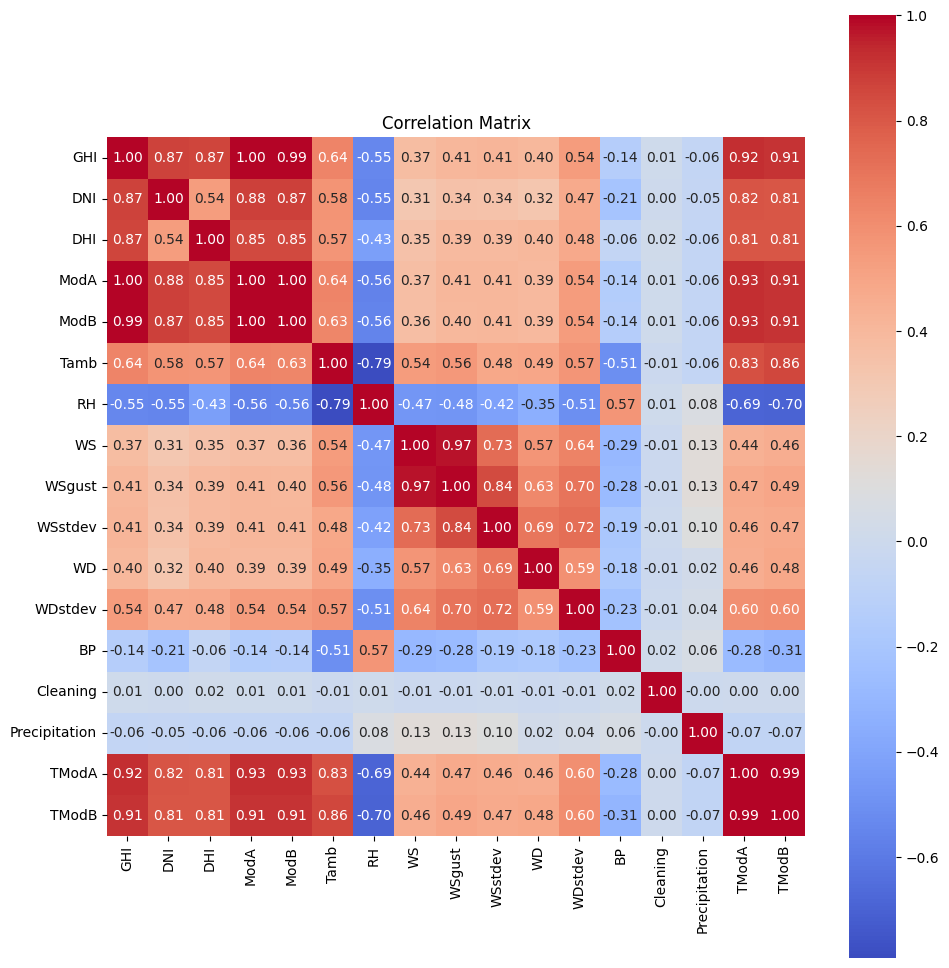

In [31]:
corr = df[num_cols].corr()
display(corr)

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


# Concise Interpretation of the Correlation Matrix

## Strongest Positive Correlations (Related to Solar Energy)
- Irradiance & Module Temperature (Very High): The strongest positive correlations exist between the irradiance variables (GHI, DNI, DHI) and the module temperatures (TModA, TModB). The correlations are exceptionally high, with coefficients often above 0.90 (e.g., DHI vs. TModB is 0.93, GHI vs. TModA is 0.92). This confirms that solar irradiance is the primary driver of PV module temperature.

- Irradiance Components (High): GHI, DNI, and DHI are all highly correlated with each other, though the correlation between DNI and DHI is slightly lower (0.54) than others, which is expected since the two components trade off depending on cloud cover.

- Ambient Temperature ($T_{amb}$) & Module Temperature (High): $T_{amb}$ shows a strong positive correlation with the module temperatures ($T_{ModA}$ and $T_{ModB}$), with coefficients around 0.86 to 0.88.

## Strongest Negative Correlations (Inverse Relationships)

- Relative Humidity (RH) & Irradiance/Temperature (Moderate): RH exhibits the most significant negative correlations, particularly with Ambient Temperature (-0.79) and all Irradiance/Module Temperature variables (ranging from -0.55 to -0.64). This suggests that high humidity often coincides with lower air temperature and less direct, peak solar radiation.

- Irradiance & Wind Speed (Weak-to-Moderate): Wind speed (WS and WSgust) shows a weak negative correlation with GHI, DNI, and DHI (around -0.37 to -0.41).

## Key Weather Interactions
- Wind Variables (Very High): Wind Speed (WS), Wind Speed Standard Deviation (WSstdev), and Wind Gust (WSgust) are all highly correlated with each other (coefficients 0.84 to 0.97), confirming their measurements capture similar atmospheric turbulence/motion.

- Barometric Pressure (BP) (Weak/Moderate): BP has a moderate negative correlation with RH (-0.57) and weaker negative correlations with most other variables.

- Precipitation: This variable has a near zero correlation with almost everything, except for a weak positive correlation with GHI (0.06). Note: The scatter plot for Precipitation vs. GHI previously analyzed showed a strong constraint high GHI only occurs when Precipitation is zero which this linear Pearson correlation does not fully capture.